In [1]:
import pandas as pd
import seaborn as sns

In [2]:
bepler = pd.read_csv('bepler_mt_embed_phrog/5CV_report.csv')
brandes = pd.read_csv('proteinbert_embeddings_phrog/5CV_report.csv')
elnaggar = pd.read_csv('protbert_bfd_embeddings_phrog/5CV_report.csv')
bepler_dlm = pd.read_csv('bepler_dlm_embed_phrog/5CV_report.csv')

bepler.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
brandes.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
elnaggar.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
bepler_dlm.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)

In [3]:
bepler['study'] = 'LSTM_Uniref90_MT'
brandes['study'] = 'Transformer_Uniref90_MT'
elnaggar['study'] = 'Transformer_BFD'
bepler_dlm['study'] = 'LSTM_Uniref90'

In [4]:
cats = ['DNA, RNA and nucleotide metabolism',
        'connector',
        'head and packaging',
        'integration and excision',
        'lysis',
        'moron, auxiliary metabolic gene and host takeover',
        'other',
        'tail',
        'transcription regulation',
       ]

In [5]:
bepler = bepler[bepler['PHROG Category'].isin(cats)]
brandes = brandes[brandes['PHROG Category'].isin(cats)]
elnaggar = elnaggar[elnaggar['PHROG Category'].isin(cats)]
bepler_dlm = bepler_dlm[bepler_dlm['PHROG Category'].isin(cats)]

In [6]:
import textwrap
import matplotlib.pyplot as plt
max_width = 17

In [7]:
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.size'] = 16

In [8]:
df = pd.concat([bepler, bepler_dlm, brandes, elnaggar])


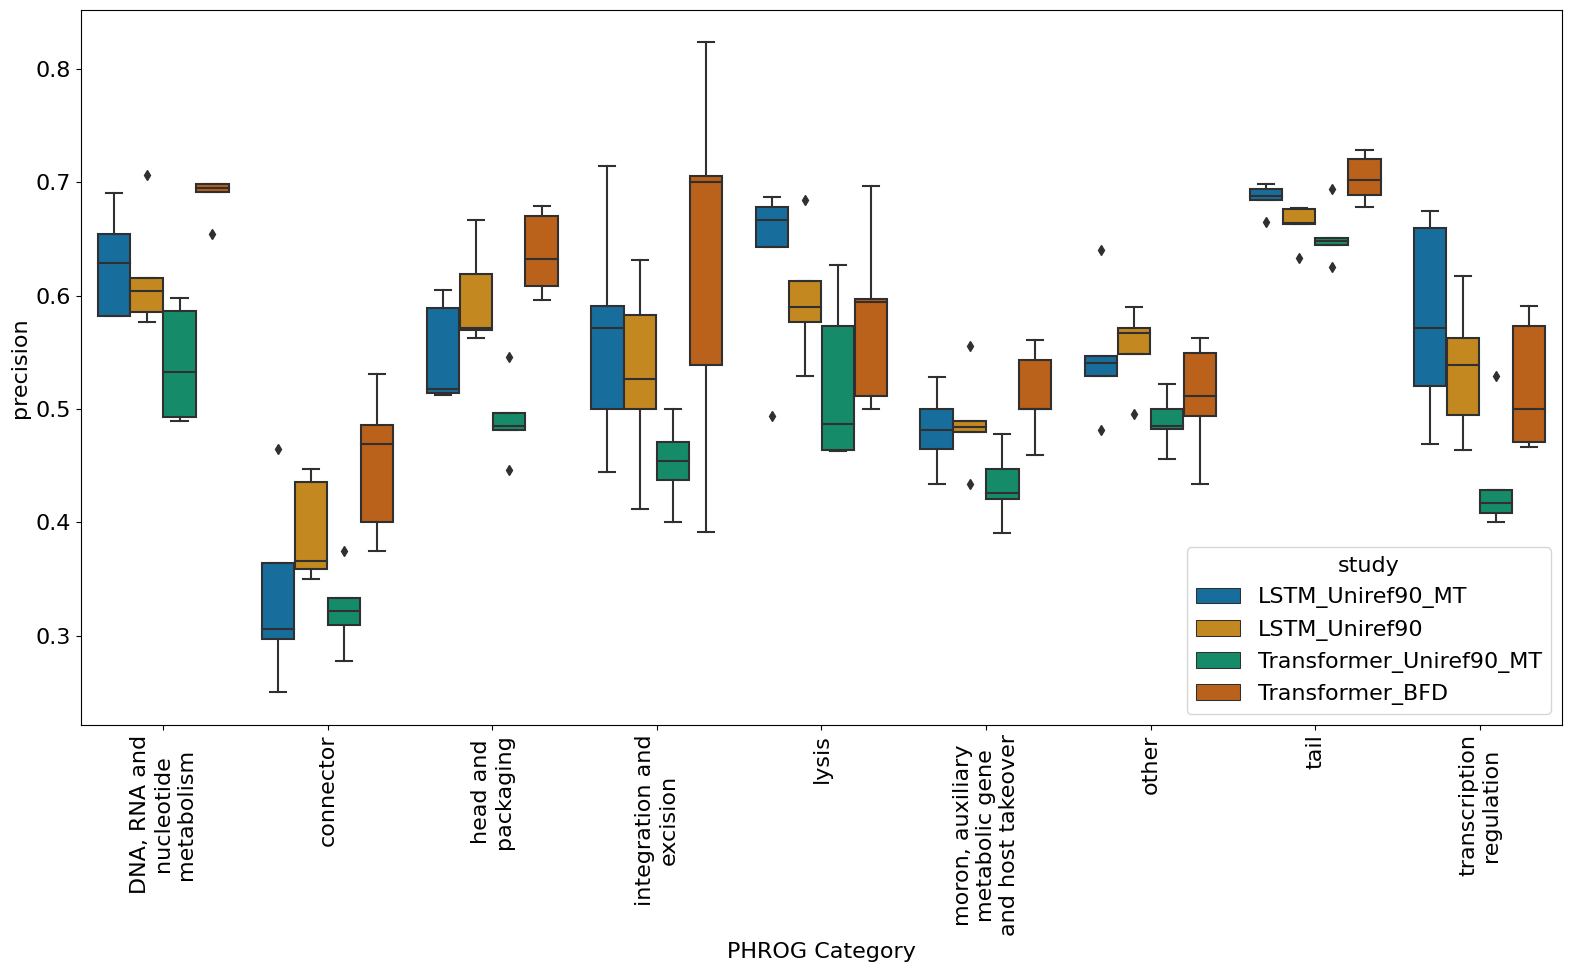

In [9]:
ax = sns.boxplot(
    y='precision', 
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
#plt.savefig('plm_performance_comparison_precision.png', dpi=300)

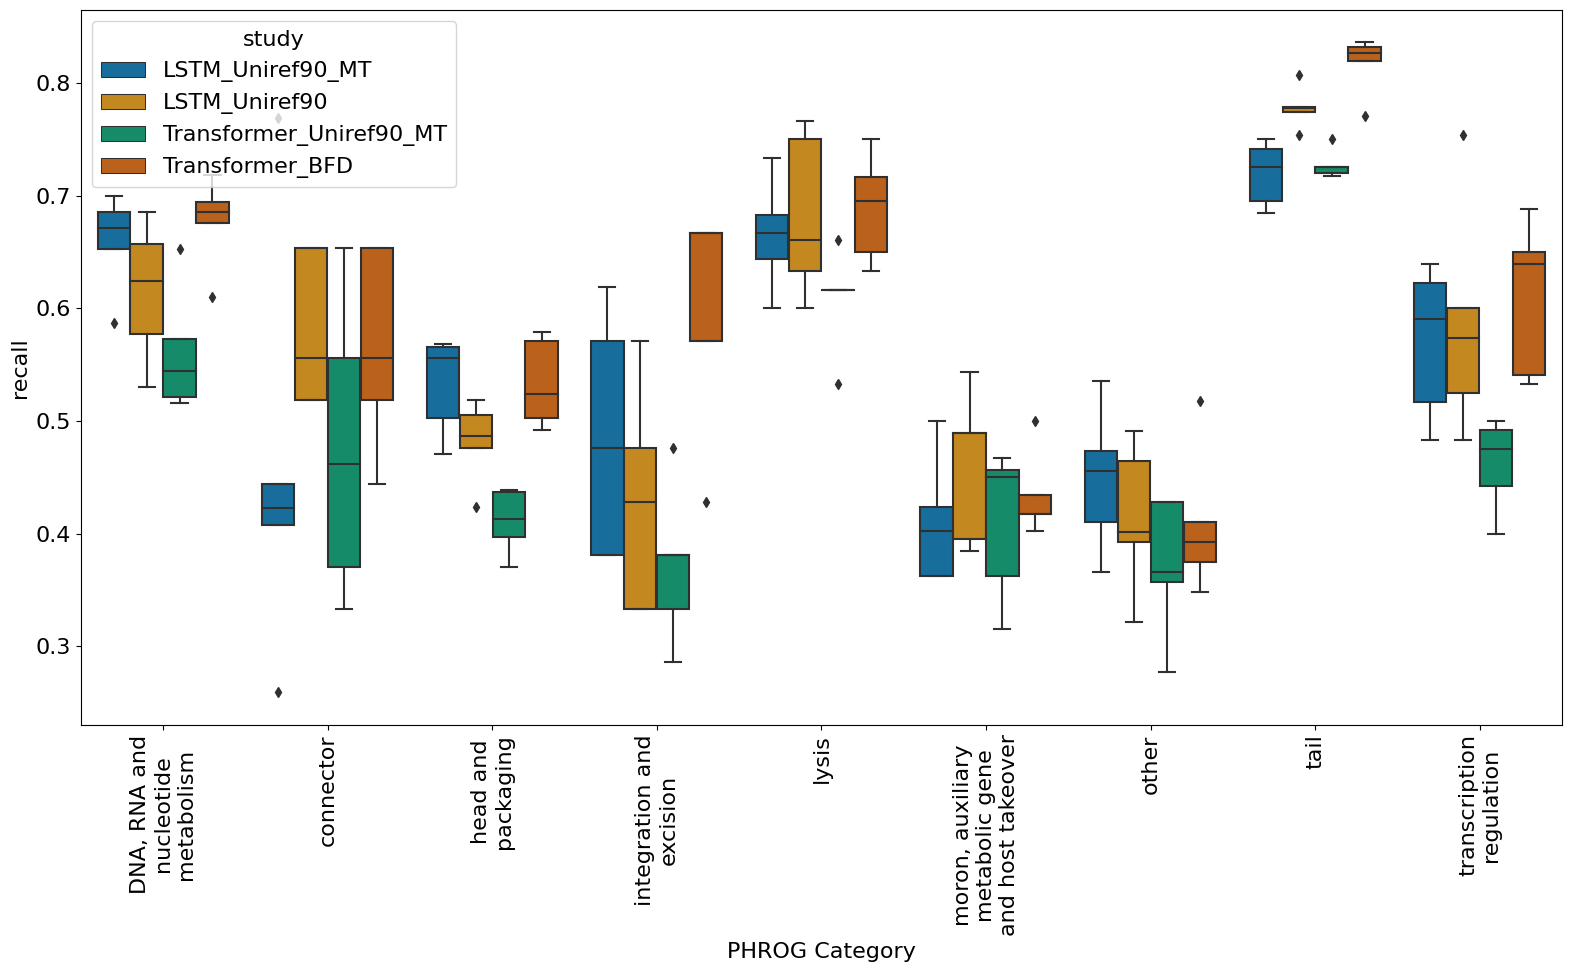

In [10]:
ax = sns.boxplot(
    y='recall', 
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
#plt.savefig('plm_performance_comparison_recall.png', dpi=300)

### F1

In [11]:
f1 = []
for r in df.iterrows():
    f1.append(2 * ((r[1]['recall'] * r[1]['precision']) / (r[1]['recall'] + r[1]['precision'])))

In [12]:
df['F1 Score'] = f1

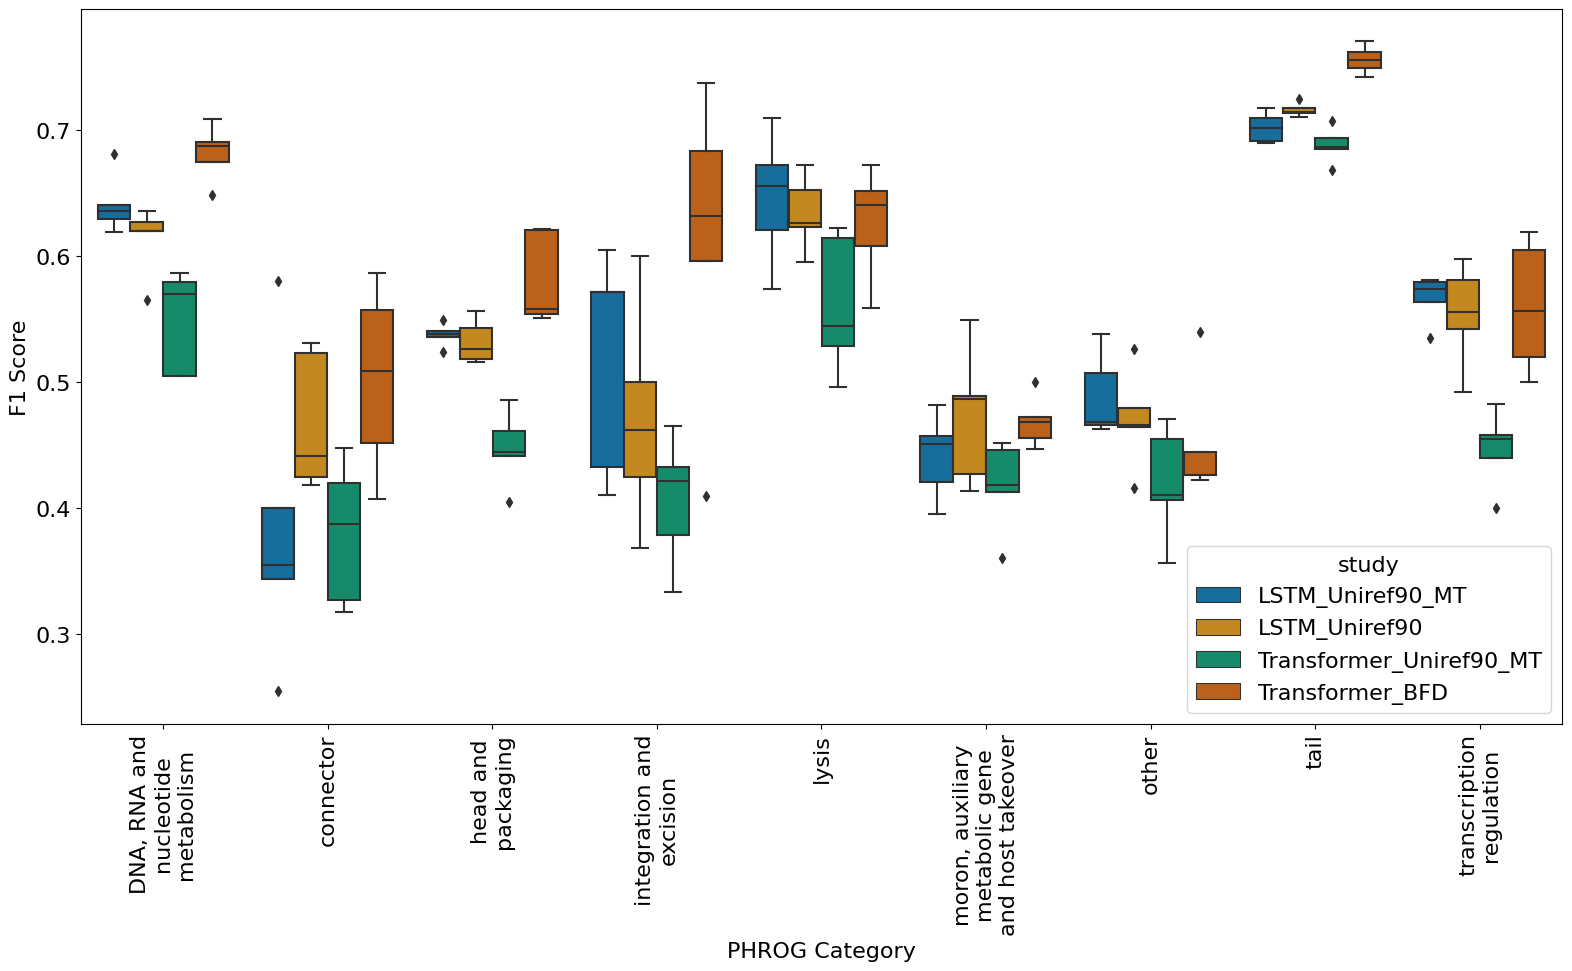

In [13]:
ax = sns.boxplot(
    y='F1 Score', 
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
plt.savefig('plm_performance_comparison_f1.png', dpi=300)